**31.01: Регресія**

Регресія. Вступ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set_theme()

Виведення графіку на проміжку від 0 до 19

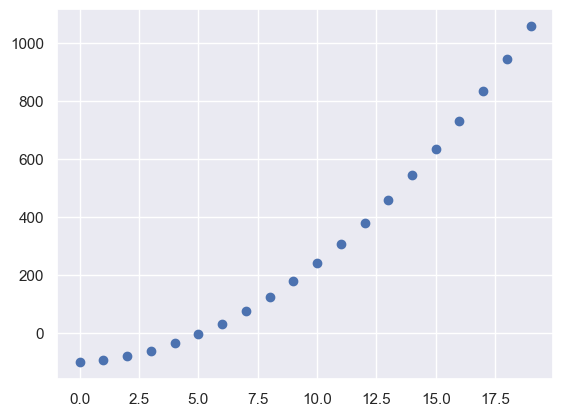

In [2]:
n = 20
X = np.arange(n)
y = 4*X+3*(X**2)-100
plt.scatter(X, y)
plt.show()

Виведення x та y

In [3]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
y

array([-100,  -93,  -80,  -61,  -36,   -5,   32,   75,  124,  179,  240,
        307,  380,  459,  544,  635,  732,  835,  944, 1059])

Регресія. Імпорт та налаштування

In [5]:
from sklearn.linear_model import LinearRegression

fit - підстановка даних. Зображення графіку та лінії регресії

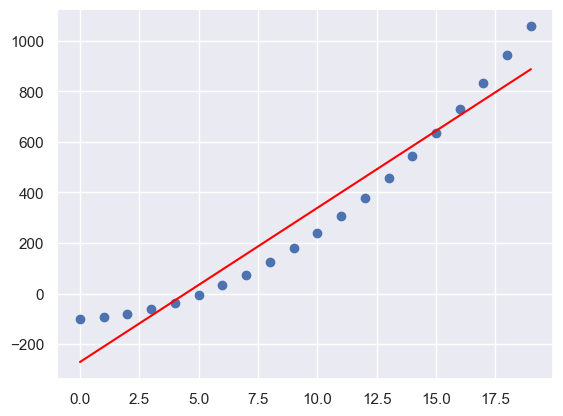

In [6]:
m = LinearRegression()
m.fit(X[:, np.newaxis], y)
y_pred = m.predict(X[:, np.newaxis])
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

Покращення регресії. Застосування поліномної функції

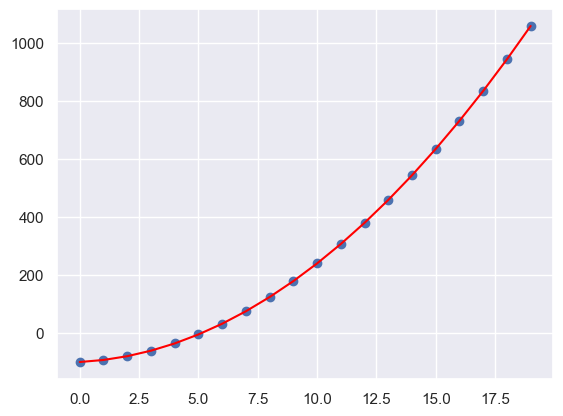

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2)
X_poly = poly_model.fit_transform(X[:, np.newaxis])

m = LinearRegression()
m.fit(X_poly, y)
y_pred = m.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

Коефіцієнти даної регресії

In [8]:
m.coef_

array([0., 4., 3.])

**02.02: Класифікація та кластеризація**

Класифікація

Завантаження датасету iris та його виведення

In [9]:
X = sns.load_dataset("iris")
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
y = X.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Вилучення колонки з датасету. Перевірка розмірності X та y

In [11]:
X = X.drop(columns={'species'})

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

Приклад базової класифікації (датасет iris)
Робимо передбачення для кожного елементу датасету

In [15]:
from sklearn.svm import SVC
m = SVC(gamma='auto').fit(X, y)
y_pred = m.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

Кластеризація

Завантаження датасету блобс та візуалізація. Параметр cluster_std - розмах точок

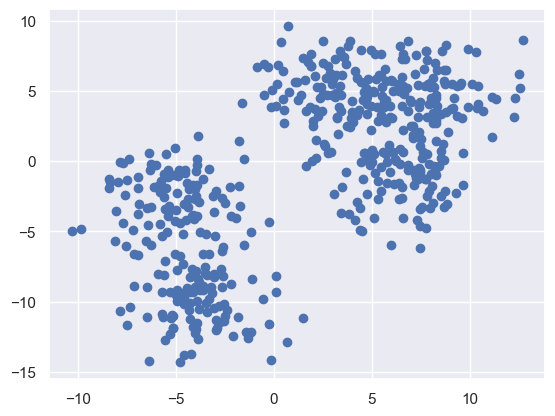

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=5, cluster_std=2)
plt.scatter(X[:,0], X[:, 1])

In [27]:
X.shape

(500, 2)

Приклад кластерізації. Візуалізація п'яти кластерів. n_clusters - кількість кластерів/груп точок

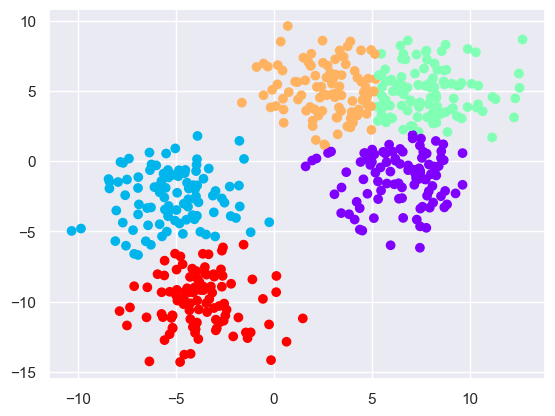

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')